# Import des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Import des Datas

In [3]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [4]:
Train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Séparation des données d'entrainement

Si nous séparons les données c'est uniquement pour pouvoir avoir des données d'entrainement et de test.
Nous pourrons donc tester nortte modèle avant de tester notre modèle sur le fichier test.

In [6]:
y = Train['label']
X = Train.drop(['label'], axis = 1)

In [7]:
X.shape, y.shape, Train.shape

((42000, 784), (42000,), (42000, 785))

### Séparation en data de train et test

In [8]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_Train.shape, y_Train.shape, X_Test.shape, y_Test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

### Reconstituons l'image

Nous avons 784 lignes.

La racine carré de 784 = 28. Comme la doc le disait, les images sont de taille 28x28 ==> 784 pixels

Une image est donc de taille 28x28x1 (car noir et blanc). Mais il y a autant d'image que la longueur de X_Train et X_Test.

In [13]:
X_Train = X_Train.values.reshape(-1,28,28,1)
X_Test = X_Test.values.reshape(-1,28,28,1)

In [35]:
class_names=['Chiffre 0','Chiffre 1','Chiffre 2','Chiffre 3','Chiffre 4','Chiffre 5','Chiffre 6','Chiffre 7','Chiffre 8','Chiffre 9']

Testons une image et son label

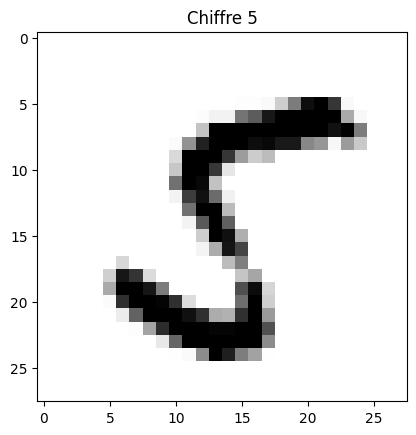

In [36]:
plt.imshow(X_Train[1], cmap = plt.cm.binary)
plt.title(class_names[y_Train.iloc[1]])
plt.show()

#### Super, on sait récupérer le label et l'image.

Du coup, testons avec des données aléatoires pour vérifier que ça marche bien!

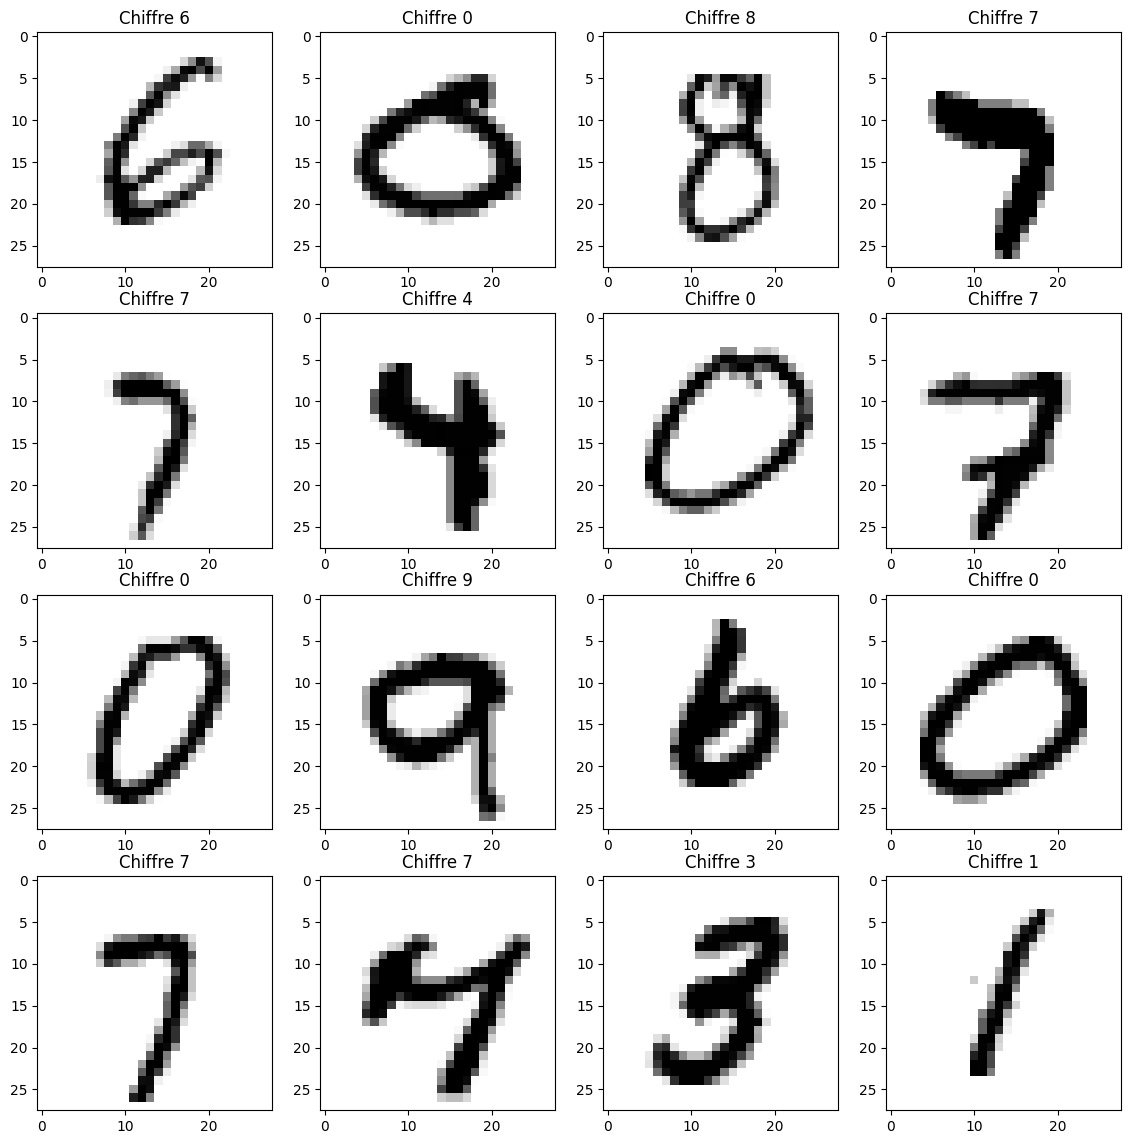

In [37]:
import random
plt.figure(figsize=(14,14))
for i in range(0,16):
  ax = plt.subplot(4,4,i+1)
  random_index = random.choice(range(len(X_Train)))
  plt.imshow(X_Train[random_index], cmap = plt.cm.binary)
  plt.title(class_names[y_Train.iloc[random_index]])
plt.show()

#### C'est Tip-Top!

Maintenant, testons la classification à l'aide d'un réseau de neurone.

Pour cela nous allons :

- Normaliser les données entra la valeur min et max.
- Tester un modèle
 - voir la courbe Loss
  - afin de voir la limite des épochs
 - Voir la courbe lr 
  - afin de voir le meilleur lr pour l'optimizer
- Tester le modèle sur les données de Test 
 - créer depuis le fichier Train (via Train Test Split)

In [38]:
X_Train_norm = X_Train/255
X_Test_norm = X_Test/255
y_Train_OH = tf.one_hot(y_Train, depth = 10)

In [60]:
model = tf.keras.Sequential(name='model')
model.add(tf.keras.layers.Flatten(input_shape=(X_Train_norm.shape[1],X_Train_norm.shape[2],1)))
model.add(tf.keras.layers.Dense(100, activation = 'relu', name = 'Input_Layer'))
model.add(tf.keras.layers.Dense(100, activation = 'relu', name = 'Hidden_Layer'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'Output_Layer'))


#Etape 2 : Compiler le modèle
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr = 1e-5), 
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch :1e-5 * 10**(epoch/20))

#3. Entrainement du modèle
history = model.fit(X_Train_norm,
                    y_Train_OH, 
                    epochs = 100, # Mettons 100 en terme d'epoch pour avoir une évolution du learning rate
                    verbose = 0,
                    callbacks=[lr_scheduler])

/Users/thibault_tercelin/opt/anaconda3/envs/Formation_Udemy_ML/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<Figure size 1000x800 with 0 Axes>

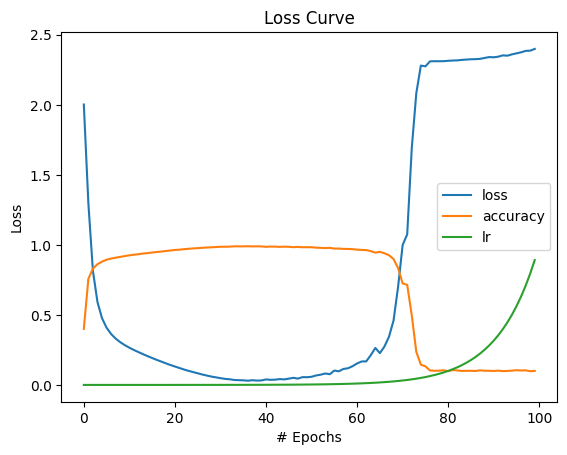

In [61]:
plt.figure(figsize=(10,8))
pd.DataFrame(history.history).plot()
plt.title('Loss Curve')
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.show()

Après l'époch "35", le loss vacille pour augmenter à partir de 40 et exploser à 60 epoch

- A 5 époch, l'`accurac` tend vers **1**
- A 60 épochs, l'`accuracy` tend vers **0**


Dès lors, choisissons une époch égale à 35 pour avoir
- `Los` minimum
- `Accurac` allant à son max

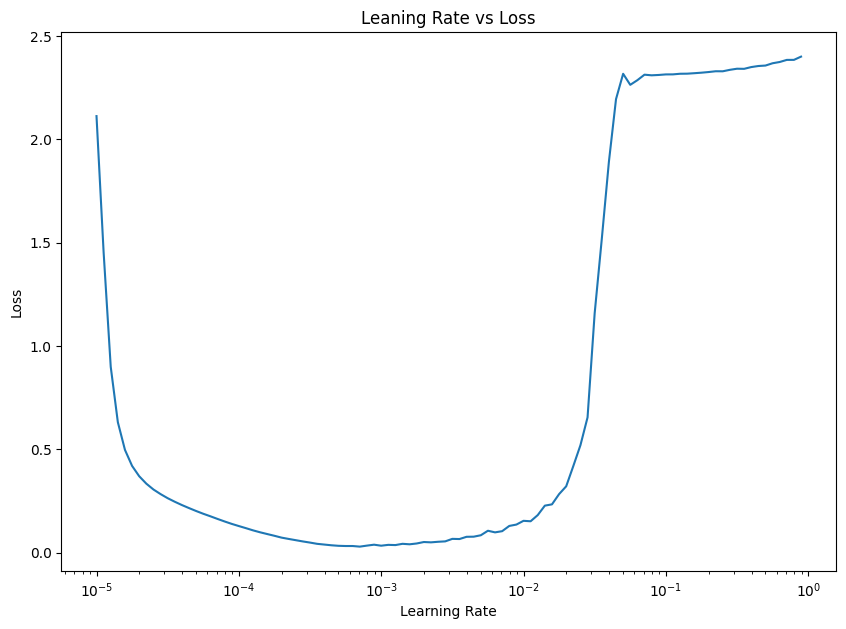

In [42]:
lrs = 1e-5 * 10**(tf.range(0,100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Leaning Rate vs Loss')
plt.show()

In [44]:
model_2 = tf.keras.Sequential(name='model_')
model_2.add(tf.keras.layers.Flatten(input_shape=(X_Train_norm.shape[1],X_Train_norm.shape[2],1)))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu', name = 'Input_Layer'))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu', name = 'Hidden_Layer'))
model_2.add(tf.keras.layers.Dense(10, activation = 'softmax', name = 'Output_Layer'))


#Etape 2 : Compiler le modèle
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr = 0.0005), 
                metrics=["accuracy"])


#3. Entrainement du modèle
history_2 = model_2.fit(X_Train_norm,
                    y_Train_OH, 
                    epochs = 35, 
                    verbose = 1)

Epoch 1/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3902 - accuracy: 0.8915
Epoch 2/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1704 - accuracy: 0.9495
Epoch 3/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1237 - accuracy: 0.9630
Epoch 4/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0947 - accuracy: 0.9712
Epoch 5/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0740 - accuracy: 0.9785
Epoch 6/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0602 - accuracy: 0.9818
Epoch 7/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0482 - accuracy: 0.9853
Epoch 8/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 9/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0321 - accuracy: 0.9903
Epoch 10/35
1050/1050 [==============================] - 1s 1ms/step - loss: 0.025

In [48]:
y_pred = model_2.predict(X_Test_norm)

In [49]:
y_pred[1]

array([4.8335086e-12, 9.9999809e-01, 1.2296782e-08, 6.1990327e-13,
       2.2566956e-08, 3.7879580e-15, 1.0019852e-12, 1.9276220e-06,
       2.6783798e-08, 3.0164335e-10], dtype=float32)

In [50]:
y_preds = y_pred.argmax(axis = 1)

In [52]:
y_preds[:5],y_Test.iloc[:5]

(array([8, 1, 9, 9, 8]),
 5457     8
 38509    1
 25536    9
 31803    9
 39863    8
 Name: label, dtype: int64)

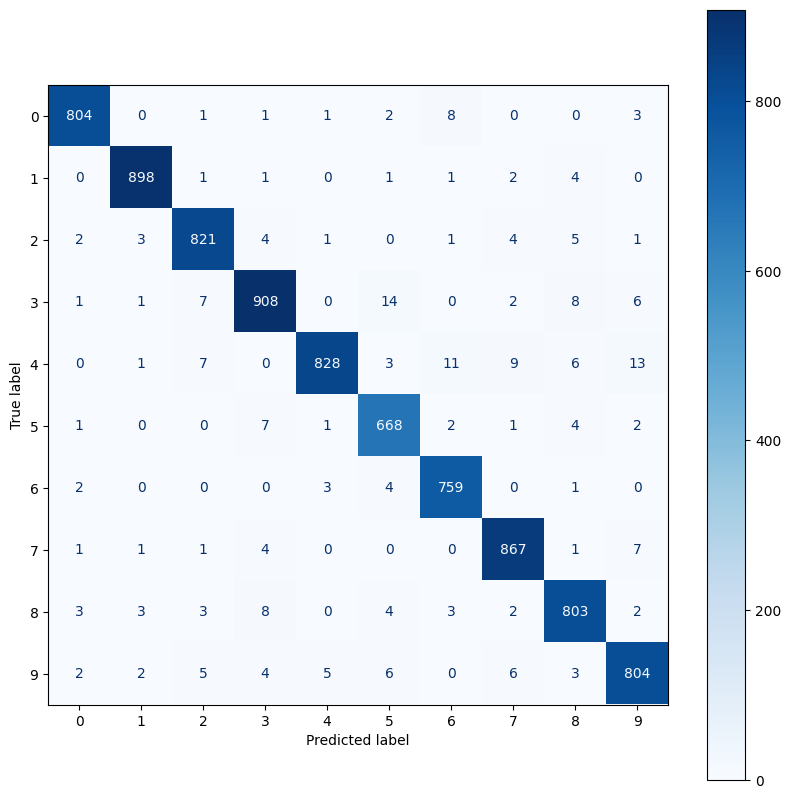

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_preds, y_Test)
cmd = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

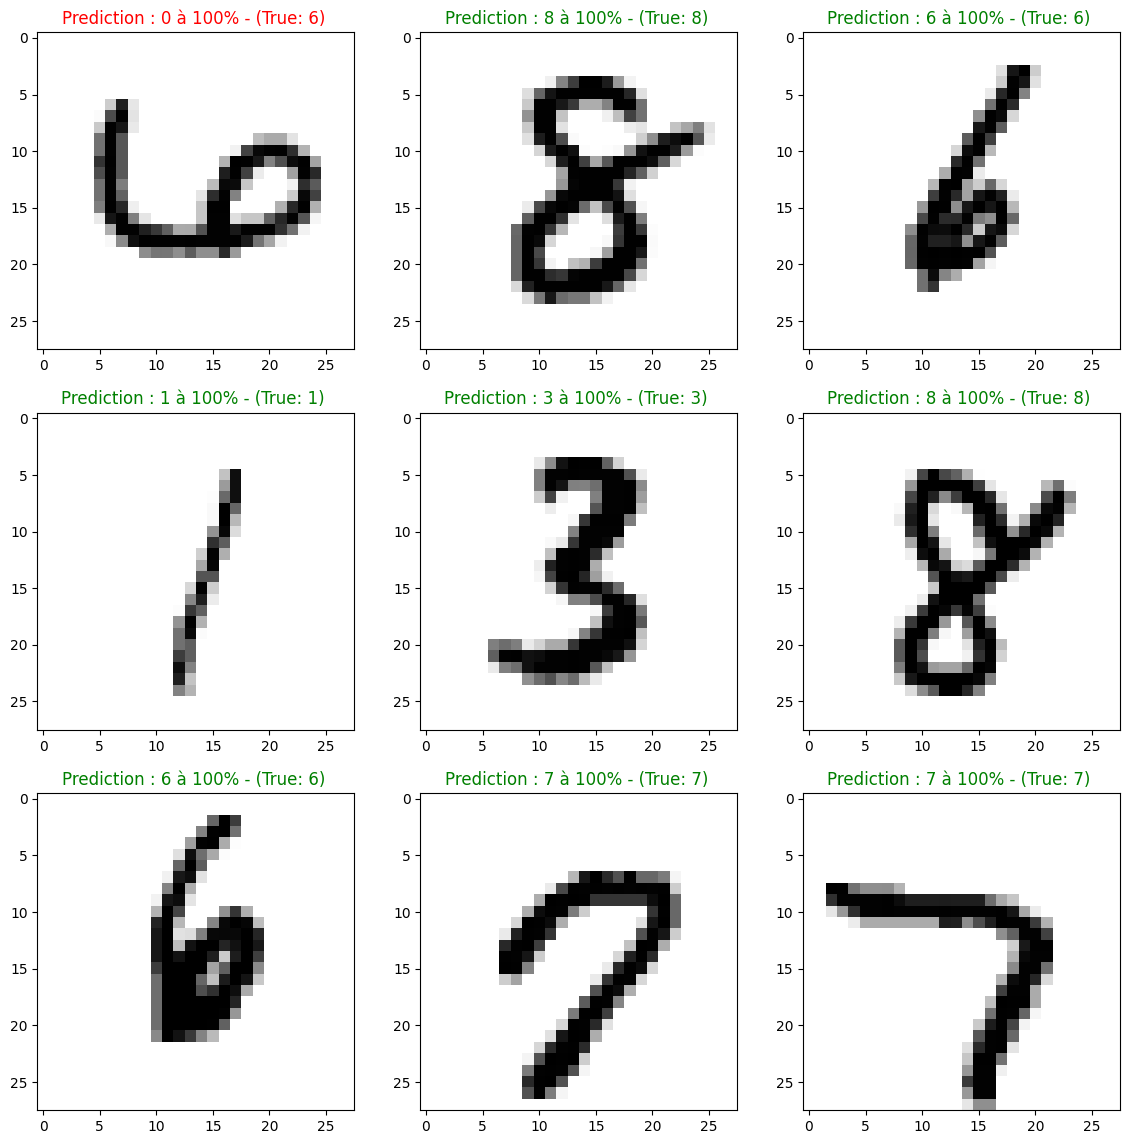

In [59]:
import random
plt.figure(figsize=(14,14))
for i in range(0,9):
  ax = plt.subplot(3,3,i+1)
  random_index = random.choice(range(len(X_Test_norm)))
  plt.imshow(X_Test_norm[random_index], cmap = plt.cm.binary)
  y_preds = model_2.predict(X_Test_norm)
  y_predict = y_preds.argmax(axis = 1)
  
  True_label = y_Test.iloc[random_index]
  Predict_label = y_predict[random_index]
  if Predict_label == True_label :
    color = 'green'
  else :
    color = 'red'
  plt.title(class_names[Predict_label], color = color)
  plt.title("Prediction : {} à {:2.0f}% - (True: {}) ".format(Predict_label, 100*tf.reduce_max(y_preds),True_label), color = color)
plt.show()